<a href="https://colab.research.google.com/github/chrisluedtke/ACM-School-Placement/blob/master/module1-statistics-probability-and-inference/LS_DS2_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [0]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [0]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [0]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [0]:
# TODO - during class, but please help!

# Coke or Pepsi experiment
# This will be represented as a binomial random variable
# 0 = Likes Pepsi
# 1 = Likes Coke

# We want a list of 30 observations (sample size n=30)
# Start by generating random data
import random
# help(random.randint)
random.seed(10)
sample = [random.randint(0, 1) for _ in range(30)]
print(sample)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0]


In [0]:
import pandas as pd
df = pd.DataFrame(sample)
df.describe()

,0
count,30.000000
mean,0.600000
std,0.498273
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


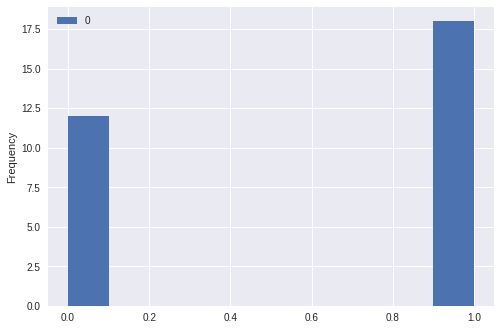

In [0]:
df.plot.hist();

In [0]:
# Now with confidence!

import scipy
# help(scipy.stats.ttest_1samp)
scipy.stats.ttest_1samp(df[0], 0.5)

Ttest_1sampResult(statistic=1.0992421631894096, pvalue=0.2807046476465548)

In [0]:
# Let's try to calculate test statistics from scratch-ish
# We need the sample standard error
df[0].std()

0.4982728791224399

In [0]:
from math import sqrt
df[0].std() / sqrt(30)

0.09097176522946843

In [0]:
# One-liner from Chris
(df[0].mean() - 0.5) / (df[0].std() / (30 ** (1/2)))

1.0992421631894094

In [0]:
# Let's make a reusable function, and do it from scratch!
def std(sample, mean):
  std = 0
  for obs in sample:
    std += (obs - mean)**2
  return (std / (len(sample) - 1)) ** (1/2)

def calculate_t_stat(sample, null_hyp):
  sample_mean = sum(sample) / len(sample)
  sample_std = std(sample, sample_mean)
  return (sample_mean - null_hyp) / (sample_std / (len(sample) ** (1/2)))

As $n \rightarrow \infty$, $\hat{\mu} \approx \mu$

("mu hat" is the sample mean, mu is the "true" population mean)

In [0]:
calculate_t_stat(survey_data, 0.5)

2.364321853156195

In [0]:
pd.DataFrame(survey_data).std()

0    0.478518
dtype: float64

In [0]:
# Let's test it
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
               1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]

# Try this with both scipy and ours
scipy.stats.ttest_1samp(survey_data, 0.5)

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [0]:
len(survey_data)

50

In [0]:
help(scipy.stats.t)

Help on t_gen in module scipy.stats._continuous_distns object:

class t_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A Student's T continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `t` is:
 |  
 |  .. math::
 |  
 |      f(x, df) = \frac{\gamma((df+1)/2)}
 |                      {\sqrt{\pi*df} \gamma(df/2) (1+x^2/df)^{(df+1)/2}}
 |  
 |  for ``df > 0``.
 |  
 |  `t` takes ``df`` as a shape parameter.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      t_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods inherited from scipy.stats._distn_infrastructure.rv_continuous:
 |  
 |  __init__(self, momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |      Initialize self.  See help(type(self)) for accurate sig

In [0]:
t = scipy.stats.t(len(survey_data))
t.cdf(calculate_t_stat(survey_data, 0.5))

0.9890062713232346

In [0]:
help(t.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x) method of scipy.stats._distn_infrastructure.rv_frozen instance



In [0]:
# A hacky solution
2 * (1 - t.cdf(calculate_t_stat(survey_data, 0.5)))

0.021987457353530804

In [0]:
# On your own optional stretch goal:
# Figure out how to get t.cdf to give us 1/2 tailed tests and not just the base

# Put the entire above "experiment" in a loop
# and run it a bunch of times for a bunch of different seeds
# and see how often the p value holds

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
from bs4 import BeautifulSoup
import re
import requests
from typing import Tuple

def get_uci_data_urls(url: str) -> Tuple[str]:
  r = requests.get(url)
  soup = BeautifulSoup(r.text, 'html.parser')

  match = soup.find('a', string='Data Folder', href=True)
  
  if not match:
    return '', ''

  db_url = match['href']
  url = url.split('/')[:-2]
  db_url = '/'.join(url) + db_url[2:]

  r = requests.get(db_url)
  soup = BeautifulSoup(r.text, 'html.parser')

  data_url = soup.find(string=re.compile(".data"), href=True)
  if data_url:
    data_url = db_url + data_url['href']

  names_url = soup.find(string=re.compile(".names"), href=True)
  if names_url:
    names_url = db_url + names_url['href']

  return data_url or '', names_url or ''

In [0]:
import pandas as pd
import numpy as np
import scipy

uci_url = 'https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records'
data_url, names_url = get_uci_data_urls(uci_url)

cols = [
  'Class Name',
  'handicapped-infants',
  'water-project-cost-sharing',
  'adoption-of-the-budget-resolution',
  'physician-fee-freeze',
  'el-salvador-aid',
  'religious-groups-in-schools',
  'anti-satellite-test-ban',
  'aid-to-nicaraguan-contras',
  'mx-missile',
  'immigration',
  'synfuels-corporation-cutback',
  'education-spending',
  'superfund-right-to-sue',
  'crime',
  'duty-free-exports',
  'export-administration-act-south-africa'
]

df = pd.read_csv(data_url, names=cols)

In [13]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [62]:
df = df.replace({'?':np.nan, 'n':0, 'y':1})
df.isnull().sum()

Class Name                                  0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [0]:
df_voted = ~df.iloc[:, 1:50].isnull() * 1
for col in df_voted:
  df_voted[col] = pd.to_numeric(df_voted[col])
  
df_voted = pd.concat([df['Class Name'], df_voted], axis=1)

In [0]:
def assess_t_stats(df):
  results = {}
  for col in df.select_dtypes(include=np.number):
    results[col] = tuple(
      scipy.stats.ttest_ind(df.loc[df['Class Name']=='democrat', col],
                            df.loc[df['Class Name']=='republican', col],
                            nan_policy='omit',
                            equal_var=False)
    )

  results = (pd.DataFrame(results)
               .T
               .rename(columns={0:'statistic', 1:'pvalue'})
               .sort_values(['pvalue', 'statistic']))
  
  return results

In [116]:
assess_t_stats(df)

,statistic,pvalue
physician-fee-freeze,-56.704806,8.820761e-193
el-salvador-aid,-23.907288,2.898373e-79
adoption-of-the-budget-resolution,22.793246,1.946704e-69
education-spending,-20.724816,3.568751e-62
crime,-19.927656,6.862816e-58
aid-to-nicaraguan-contras,18.254856,2.288121e-52
mx-missile,17.409048,4.289262e-51
duty-free-exports,14.376245,3.812922e-38
superfund-right-to-sue,-14.352567,7.597900e-38
anti-satellite-test-ban,12.467493,1.362781e-29


In [118]:
assess_t_stats(df_voted)

,statistic,pvalue
export-administration-act-south-africa,-4.576925,0.000006
mx-missile,-2.835053,0.004804
aid-to-nicaraguan-contras,2.458408,0.014734
el-salvador-aid,-1.659582,0.097723
religious-groups-in-schools,-1.569881,0.117175
handicapped-infants,-1.050963,0.293876
physician-fee-freeze,-0.826957,0.408738
duty-free-exports,0.466165,0.641402
water-project-cost-sharing,0.452715,0.651043
synfuels-corporation-cutback,0.400109,0.689333


# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/